**‼처음부터 실행하지 말고, 각 파트 끝에 데이터를 저장하고, 다음 파트 담당자는 해당 데이터를 불러와서 작업할 것**
- 각 load, save 함수 사용

In [29]:
name_list = ['BukGu', 'DalseongGun', 'DalsuGu', 'DongGu', 'JungGu', 'NamGu', 'SeoGu', 'Suseonggu']
complain_list = []

In [30]:
def save():
    for i, v in enumerate(name_list):
        complain_list[i].to_csv(v + '.csv',index=False)

In [31]:
def load():
    for i, v in enumerate(name_list):
        complain_list.append(pd.read_csv(v + '.csv'))

In [32]:
load()

# 0. 라이브러리, row data 불러오기

In [33]:
import numpy as np
import pandas as pd

----

In [5]:
# row data
for i in name_list: 
    complain_list.append(pd.read_csv('../데이터 수집/크롤링/complain_' + i + '.csv'))

In [6]:
print(name_list[0])
complain_list[0].head()

BukGu


,title,content,dept
0,"매천동 청구장미아파트,삼우그린 입구 불합리","위치 : 매천동 청구장미아파트,삼우그린아파트 들어가는 입구 (매천생활용품 바로 옆 ...",도시국 건설과
1,처리중..언제까지,어린이보호구역 불법주차 불법적재 신고한지가 언제인데 아직 처리중...\r\n적재물도...,도시국 도시행정과
2,도로개설,"본인은 대구시 북구 태전동 81-1, 74, 75번지 토지 소유자 입니다.\r\n현...",도시국 건설과
3,북구청장감사실은 뭐 하는 곳 입니까? 묻습니다. 불법에 대한 최고의 북구 전문가,북구청장\r\n\r\n감사실은 뭐 하는 곳 입니까? 묻습니다. 불법에 대한 최고의 ...,감사실
4,대구시장 북구청장 감사실은 뭐 하는 부서 입니까? 감사실 폐쇄하셔요? 미관지구,대구시장 북구청장\r\n\r\n감사실은 뭐 하는 부서 입니까? 감사실 폐쇄하셔요?\...,감사실


In [11]:
complain_list[0].iloc[0]['content']

'위치 : 매천동 청구장미아파트,삼우그린아파트 들어가는 입구 (매천생활용품 바로 옆 진입로)\r\n내용: 사람들이 자주 이용하는 횡단보도가 있고 아파트로 들어가는 차량들이 많이 다님에도 불구하고 새벽에 매천생활용품점과 자동차수리점이 문을 닫는 시간이 되면 거리가 너무 어두컴컴해서 보행자를 칠 우려가 있음.(자동차 우측 사각지대 + 늦은밤 어두컴컴한 거리) 꼭! 매천생활용품점과 자동차수리점이 문을 닫는 시간 대 거리에 조명시설 확인 후 조치해야할 것입니다. 사진도 첨부합니다.\r\n\r\n※ 첨부파일 :\r\nIMG_2181.jpeg\r\nIMG_2182.jpeg'

In [13]:
for i, v in enumerate(name_list):
    print(v, complain_list[i].shape)

BukGu (9237, 3)
DalseongGun (2764, 3)
DalsuGu (5862, 3)
DongGu (4894, 3)
JungGu (3026, 3)
NamGu (2782, 3)
SeoGu (2663, 3)
Suseonggu (7616, 3)


In [12]:
for i, v in enumerate(name_list):
    print(v)
    print(complain_list[i]['dept'].value_counts())
    print()

BukGu
감사실              2235
도시국 건축주택과        1186
도시국 교통과          1121
도시국 건설과          1038
주민생활지원국 환경관리과     437
                 ... 
전략사업팀               1
의회사무국               1
보건소 강북보건지소          1
-                   1
대현2동                1
Name: dept, Length: 93, dtype: int64

DalseongGun
건설도시국 건축과       536
경제환경국 교통과       480
건설도시국 건설과       404
경제환경국 환경과       212
문화관광국 공원녹지과     189
건설도시국 안전총괄과     113
건설도시국 교통과        99
건설도시국 도시정비과      88
건설도시국 도시계획과      70
경제환경국 청소위생과      64
문화관광국 문화예술과      59
화원읍              48
다사읍              37
교육복지국 교육정책과      36
경제환경국 농업정책과      34
자치행정국 종합민원과      31
보건소 보건과          29
주민복지국 복지정책과      24
가창면              22
정책관광국 관광과        20
경제환경국 일자리경제과     15
논공읍              15
자치행정국 자치행정과      14
주민복지국 희망지원과      12
옥포읍              12
정책추진단            10
보건소 건강증진과         9
유가읍               9
구지면               8
자치행정국 회계과         7
자치행정국 정보통신과       7
기획예산실             6
현풍읍               5
농업기술센터 농촌지도과      4
법무감사실             4
의회

# 1. content = 제목 + 내용

In [14]:
complain_list[0].head()

,title,content,dept
0,"매천동 청구장미아파트,삼우그린 입구 불합리","위치 : 매천동 청구장미아파트,삼우그린아파트 들어가는 입구 (매천생활용품 바로 옆 ...",도시국 건설과
1,처리중..언제까지,어린이보호구역 불법주차 불법적재 신고한지가 언제인데 아직 처리중...\r\n적재물도...,도시국 도시행정과
2,도로개설,"본인은 대구시 북구 태전동 81-1, 74, 75번지 토지 소유자 입니다.\r\n현...",도시국 건설과
3,북구청장감사실은 뭐 하는 곳 입니까? 묻습니다. 불법에 대한 최고의 북구 전문가,북구청장\r\n\r\n감사실은 뭐 하는 곳 입니까? 묻습니다. 불법에 대한 최고의 ...,감사실
4,대구시장 북구청장 감사실은 뭐 하는 부서 입니까? 감사실 폐쇄하셔요? 미관지구,대구시장 북구청장\r\n\r\n감사실은 뭐 하는 부서 입니까? 감사실 폐쇄하셔요?\...,감사실


In [16]:
# 제목 + 내용 합치기
for i, v in enumerate(name_list):
    complain_list[i]['content'] = complain_list[i]['title'] + ' ' + complain_list[i]['content']
    complain_list[i] = complain_list[i].drop(['title'], axis=1)

In [17]:
complain_list[0].head()

,content,dept
0,"매천동 청구장미아파트,삼우그린 입구 불합리 위치 : 매천동 청구장미아파트,삼우그린아...",도시국 건설과
1,처리중..언제까지 어린이보호구역 불법주차 불법적재 신고한지가 언제인데 아직 처리중....,도시국 도시행정과
2,"도로개설 본인은 대구시 북구 태전동 81-1, 74, 75번지 토지 소유자 입니다....",도시국 건설과
3,북구청장감사실은 뭐 하는 곳 입니까? 묻습니다. 불법에 대한 최고의 북구 전문가 북...,감사실
4,대구시장 북구청장 감사실은 뭐 하는 부서 입니까? 감사실 폐쇄하셔요? 미관지구 대구...,감사실


# 2. 읍/면/동/리 -> 동사무소 통합
- 시/군/구 -> 읍/면/동/리
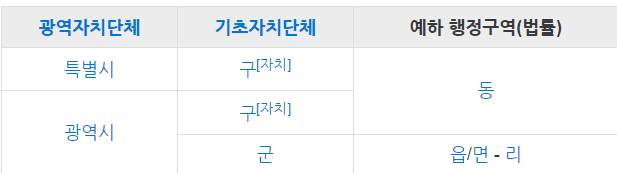

In [ ]:
for i, v in enumerate(name_list):
    print(v)
    print(complain_list[i]['dept'].loc[complain_list[i]['dept'].str.endswith(('읍', '면', '동', '리', '가'))])

BukGu
300       복현2동
602       침산1동
713       태전2동
1851      침산2동
1933       국우동
         ...  
9067    노원1.2동
9071     무태조야동
9114       구암동
9182       칠성동
9192       구암동
Name: dept, Length: 98, dtype: object
DalseongGun
14      화원읍
17      옥포읍
19      논공읍
38      화원읍
51      구지면
       ... 
2636    유가면
2638    옥포읍
2646    유가면
2658    논공읍
2713    유가면
Name: dept, Length: 163, dtype: object
DalsuGu
28       본리동
113     월성1동
115     월성1동
137      본리동
185     송현2동
        ... 
5802     도원동
5827    송현2동
5834    월성1동
5841     신당동
5845    월성1동
Name: dept, Length: 192, dtype: object
DongGu
281      도평동
285      혁신동
449      혁신동
526      동촌동
637      동촌동
        ... 
4437    신천3동
4512     방촌동
4549    안심2동
4725    신천3동
4727     지저동
Name: dept, Length: 80, dtype: object
JungGu
30      대봉2동
34      남산4동
95      남산4동
168      대신동
180      삼덕동
780     대봉2동
834     성내1동
856     남산4동
970     성내3동
1013    성내3동
1093    성내2동
1196     동인동
1201    성내2동
1240    성내2동
1311    성내2동
1541     삼덕동
2247    성내1동
22

In [ ]:
# 리, 가 로 끝나는 부서명은 없다
for i, v in enumerate(name_list):
    print(v)
    print(complain_list[i]['dept'].loc[complain_list[i]['dept'].str.endswith(('리', '가'))])

BukGu
Series([], Name: dept, dtype: object)
DalseongGun
Series([], Name: dept, dtype: object)
DalsuGu
Series([], Name: dept, dtype: object)
DongGu
Series([], Name: dept, dtype: object)
JungGu
Series([], Name: dept, dtype: object)
NamGu
Series([], Name: dept, dtype: object)
SeoGu
Series([], Name: dept, dtype: object)
Suseonggu
Series([], Name: dept, dtype: object)


In [31]:
for i, v in enumerate(name_list):
    complain_list[i].loc[complain_list[i]['dept'].str.endswith(('읍', '면', '동')), 'dept'] = '읍/면/동사무소'

In [32]:
for i, v in enumerate(name_list):
    print(v)
    print(complain_list[i]['dept'].loc[complain_list[i]['dept'].str.endswith(('읍', '면', '동', '리', '가'))])

BukGu
Series([], Name: dept, dtype: object)
DalseongGun
Series([], Name: dept, dtype: object)
DalsuGu
Series([], Name: dept, dtype: object)
DongGu
Series([], Name: dept, dtype: object)
JungGu
Series([], Name: dept, dtype: object)
NamGu
Series([], Name: dept, dtype: object)
SeoGu
Series([], Name: dept, dtype: object)
Suseonggu
Series([], Name: dept, dtype: object)


# 3. 이상치 제거

## 1) 부서가 '-' 인 것 제외

In [18]:
complain_list[0].loc[complain_list[0]['dept'] == '-']

,content,dept
7555,음식물쓰레기 수거를 안해가요~!! 제가 몇일을 기다리다 못해 이렇게 글을 올립니다....,-


In [20]:
for i, v in enumerate(name_list):
    complain_list[i] = complain_list[i].loc[~(complain_list[i]['dept'] == '-')]

In [21]:
complain_list[0].loc[complain_list[0]['dept'] == '-']

,content,dept


## 2) 테스트 게시물 제외

In [30]:
# 테스트인 게시물, 실제 민원 내용이 섞여있음. 하나씩 직접 제거
complain_list[0].loc[complain_list[0]['content'].str.contains('테스트', na=False)]

,content,dept
3076,야간 조명(불빛)에 따른 민원 접수 합니다. 북구청 관내 위치한 복현 서한2차 11...,도시국 건축주택과
8103,관리자 테스트중 테스트중입니다,총무국 민원봉사과
8540,테스트 테스트,총무국 총무과
8782,밤 12시 넘어 청소차량 운행하는 이유가 뭡니까? 제발!!!! 밤 12시 넘어서 청...,주민생활지원국 환경관리과
9233,테스트 테스트,총무국 총무과
9234,[테스트]기관홈페이지신청민원_국민제안발굴_(대구광역시 북구) 테스트,총무국 총무과
9235,[테스트]기관홈페이지신청민원_민원처리_(대구광역시 북구) 테스트,총무국 총무과


In [ ]:
# # 테스트 게시물 제외
# for i, v in enumerate(name_list):
#     complain_list[i] = complain_list[i].loc[~complain_list[i]['content'].str.contains('테스트', na=False)]

In [36]:
test_list = []

In [38]:
for i, v in enumerate(name_list):
    test_list.append(complain_list[i].loc[complain_list[i]['content'].str.contains('테스트', na=False)])

In [41]:
print(test_list[0])
complain_list[0] = complain_list[0].drop([8103, 8540, 9233, 9234, 9235])

                                                content           dept
3076  야간 조명(불빛)에 따른 민원 접수 합니다. 북구청 관내 위치한 복현 서한2차 11...      도시국 건축주택과
8103                                   관리자 테스트중 테스트중입니다      총무국 민원봉사과
8540                                            테스트 테스트        총무국 총무과
8782  밤 12시 넘어 청소차량 운행하는 이유가 뭡니까? 제발!!!! 밤 12시 넘어서 청...  주민생활지원국 환경관리과
9233                                            테스트 테스트        총무국 총무과
9234              [테스트]기관홈페이지신청민원_국민제안발굴_(대구광역시 북구) 테스트        총무국 총무과
9235                [테스트]기관홈페이지신청민원_민원처리_(대구광역시 북구) 테스트        총무국 총무과


In [42]:
complain_list[0].loc[complain_list[0]['content'].str.contains('테스트', na=False)]

,content,dept
3076,야간 조명(불빛)에 따른 민원 접수 합니다. 북구청 관내 위치한 복현 서한2차 11...,도시국 건축주택과
8782,밤 12시 넘어 청소차량 운행하는 이유가 뭡니까? 제발!!!! 밤 12시 넘어서 청...,주민생활지원국 환경관리과


In [43]:
print(test_list[1])

                                                content       dept
1389  김부성 지난달 공단직원 채용 공고를 보고 실버직에 지원하기 위해 60대 이상의 연령...      기획예산실
1459  국가산단 반도2차 콘크리트 품질관리 위반, 공사중지명령부탁드립니다. 수고많으십니다....  건설도시국 건축과
2728  옥포미진이지비아 106동 방음벽 설치관련 件 안녕하십니까 저는 3월에 미진이지비아 ...  건설도시국 건축과


In [44]:
print(test_list[2])

                                                content           dept
1980  달구벌대로 1545 골든뷰메디타워 9층 용도변경 반대합니다 안녕하세요\r\n\r\n...      도시창조국 건축과
3648  올림픽 기념관에서 하는 체력증진 교실 수업이 계속 진행할수 있도록 도와주세요!! 안...  복지문화국 문화체육관광과
4887  웃는 얼굴 행복한 달서..참 웃기네요 6월23일 11시경 견인관리사업소에 견인을 당...    경제환경국 주차관리과
5187  감삼동 월드마크웨스트엔드 준공 문제점 감삼동 대우월드마크웨스트엔드 입주자입니다.지금...      도시창조국 건축과


In [45]:
print(test_list[3])

                                                content           dept
1923  대구혁신도시 서한이다음 1차아파트 사전점검 하고 왔습니다. 대구혁신도시 서한이다음 ...    도시안전국 건축주택과
4113  책임감없고 불친절고 개념없는 교통과 공무원 고발합니다 ※문제 시발점:\r\n오늘4/...      도시건설국 교통과
4650  사람 테스트 합니까? 지금 장난하시는거는 아니시죠??\r\n서버나 홈페이지상에 문제...  주민생활지원국 환경청소과


In [46]:
print(test_list[4])

                                               content         dept
888  김광석 다시부르기 콘테스트 신청 사이트 접속 불가문제 김광석 다시부르기 콘테스트 안...  도시재생국 문화개발과


In [48]:
print(test_list[5])
complain_list[5] = complain_list[0].drop([2217])

                                                content         dept
724   2000배 행복마을 축제 2000배 행복마을축제가 12월 2일 진행되었습니다. 축제...     읍/면/동사무소
1365  대명동 1723-7번지, 향후 닥트 환풍기 문제 민원으로 찾아오지 마십시오. 안녕하...    주민행복국 위생과
1506  기초수급자 방문조사에 관한 문의 및 요청 먼저 수고많으십니다.\n기초수급자 방문조사...  주민행복국 생활보장과
2009  아스팔트 방사능 가든호텔주변 아스팔트 공사하는데 방사능검출 되는건아니겠죠~?\n작업...    도시창조국 건설과
2217                                   테스트 입니다1 테스.....        기획조정실


In [50]:
print(test_list[6])
complain_list[6] = complain_list[6].drop([1087, 2222])

                                                content         dept
671   상리공원 토요일 오전 행사 금지해주세요. 안녕하세요.\n상리공원 근처 용산파크타운에...  도시안전국 도시공원과
1087                                            테스트 테스트  자치행정국 종합민원과
2222      [테스트]기관홈페이지신청민원-국민제안발굴(대구 서구) 테스트입니다-(국민제안발굴)  행정관리국 봉사행정과


In [51]:
print(test_list[7])

                                                content         dept
33    수성 뷰웰 리버파크 소방(제연설비) 문제 안녕하세요 저는 수성 뷰웰 리버파크 예비 ...      도시국 건축과
44    수성뷰웰리버파크 준공승인 반대(제연설비 소방법 위반, 계단 난간 미고정 등) 안녕하...      도시국 건축과
485   고산평생학습센터 댄스동아리(야간)연계 아닌 정식 댄스스포츠 야간/중급반 개설 요청 ...  문화교육국 교육지원과
486   파동KCC 주민의 안전을 책임져주세요 파동드림힐즈는 산을 깍아서 지어진 집입니다\n...      도시국 건축과
2665  75633 민원번호 75633번 소음공해에 대한 민원이 해결이 되지 않아 글 올립니...    복지국 경제환경과
3241  만촌초등학교 옆 편 내리막 굉장히 미끄럽습니다 만촌동에 거주중인 주민입니다.\n\n...      도시국 교통과
4166  수성구보건소(산전검사관련) 둘째출산을 계획하고 자가테스트후 보건소에서 산전검사를 받...    보건소 보건행정과
5477  소방검검에 대한 추가 질문입니다 저는 유성푸르나임르노블 701호 입주예정자입니다\n...      도시국 건축과
5484  소방안전이 우려되어 구청장님,소방서장님,mbc,건설회사관계자님들,예비입주자들이 합동...      도시국 건축과
6149  환경미화원 심사기준! 몇주전 수성구 환경미화원 시험이 있었다고 들었습니다.\n1차 ...    복지국 자원순환과
6168  재가바랍니다 존경하는 구청장님\n이번에 이루어진 환경미화원 모집에 응시란 지원생의 ...    복지국 자원순환과


# 4. 중복 내용 제거
- 한 사람이 여러 개의 똑같은 게시물을 작성하는 경우 drop

In [52]:
complain_list[0].loc[complain_list[0].duplicated()]

,content,dept
25,북구청장감사실은 뭐 하는 곳 입니까? 묻습니다. 불법에 대한 최고의 북구 전문가 북...,감사실
26,대구시장 북구청장 감사실은 뭐 하는 부서 입니까? 감사실 폐쇄하셔요? 미관지구 대구...,감사실
27,북구청장 주거환경정비 해당주민 반대에 전화 문자 카톡 구민재산 생활 고통종식하라 본...,도시국 건축주택과
28,북구청장 115전 전보다 못한 행정 북구 전문가인가 상식있는 구민은 알고 한탄한다 ...,보건소 위생과
29,북구청장 재활용쓰레기 처리 못 하는게 경영의 최고 전문가 인가? 평가는 구민이 북구...,복지환경국 자원순환과
...,...,...
6352,안돼안돼 구청에서하신자전거무료수리센타대환영입니다 근데서구에서 유통단지을출퇴근합니다 ...,도시국 교통과
6415,버스 정류장 위치 변경 검토 요청의 건 구민의 복지를 위한 많은 노력에 감사를 드립...,도시국 교통과
6477,국내자매도시 운영계획을 보고 국내 자매도시 6곳 가운데 시 직영이나 위탁 받은 단체...,총무국 총무과
7489,상가에서 인도에 진열해놓은 물건좀 치워주세요! 저는 부영 7단지에 사는 주민입니다\...,도시국 재난안전과


In [53]:
for i, v in enumerate(name_list):
    complain_list[i] = complain_list[i].loc[~(complain_list[i].duplicated())]

In [54]:
complain_list[0].loc[complain_list[0].duplicated()]

,content,dept


# 5. 불용어 제거

## 1) 첨부파일 ~ 문자열 제거

In [55]:
complain_list[0].iloc[0]['content']

'매천동 청구장미아파트,삼우그린 입구 불합리 위치 : 매천동 청구장미아파트,삼우그린아파트 들어가는 입구 (매천생활용품 바로 옆 진입로)\r\n내용: 사람들이 자주 이용하는 횡단보도가 있고 아파트로 들어가는 차량들이 많이 다님에도 불구하고 새벽에 매천생활용품점과 자동차수리점이 문을 닫는 시간이 되면 거리가 너무 어두컴컴해서 보행자를 칠 우려가 있음.(자동차 우측 사각지대 + 늦은밤 어두컴컴한 거리) 꼭! 매천생활용품점과 자동차수리점이 문을 닫는 시간 대 거리에 조명시설 확인 후 조치해야할 것입니다. 사진도 첨부합니다.\r\n\r\n※ 첨부파일 :\r\nIMG_2181.jpeg\r\nIMG_2182.jpeg'

In [58]:
# 첨부파일 ~ 문자열 삭제
for i, v in enumerate(name_list):
    complain_list[i]['content'] = complain_list[i]['content'].astype(str).apply(lambda x : x.split('첨부파일')[0])

C:\Users\User\AppData\Local\Temp\ipykernel_18360\2464448555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complain_list[i]['content'] = complain_list[i]['content'].astype(str).apply(lambda x : x.split('첨부파일')[0])


In [59]:
complain_list[0].iloc[0]['content']

'매천동 청구장미아파트,삼우그린 입구 불합리 위치 : 매천동 청구장미아파트,삼우그린아파트 들어가는 입구 (매천생활용품 바로 옆 진입로)\r\n내용: 사람들이 자주 이용하는 횡단보도가 있고 아파트로 들어가는 차량들이 많이 다님에도 불구하고 새벽에 매천생활용품점과 자동차수리점이 문을 닫는 시간이 되면 거리가 너무 어두컴컴해서 보행자를 칠 우려가 있음.(자동차 우측 사각지대 + 늦은밤 어두컴컴한 거리) 꼭! 매천생활용품점과 자동차수리점이 문을 닫는 시간 대 거리에 조명시설 확인 후 조치해야할 것입니다. 사진도 첨부합니다.\r\n\r\n※ '

## 2) 정규표현식 사용, 불용어 제거

In [60]:
import re
def get_only_hangul(line):
	parseText= ''.join(re.compile('[ |가-힣]*').findall(line))
	return parseText

In [61]:
complain_list[0].iloc[0]['content']

'매천동 청구장미아파트,삼우그린 입구 불합리 위치 : 매천동 청구장미아파트,삼우그린아파트 들어가는 입구 (매천생활용품 바로 옆 진입로)\r\n내용: 사람들이 자주 이용하는 횡단보도가 있고 아파트로 들어가는 차량들이 많이 다님에도 불구하고 새벽에 매천생활용품점과 자동차수리점이 문을 닫는 시간이 되면 거리가 너무 어두컴컴해서 보행자를 칠 우려가 있음.(자동차 우측 사각지대 + 늦은밤 어두컴컴한 거리) 꼭! 매천생활용품점과 자동차수리점이 문을 닫는 시간 대 거리에 조명시설 확인 후 조치해야할 것입니다. 사진도 첨부합니다.\r\n\r\n※ '

In [62]:
for i, v in enumerate(name_list):
    complain_list[i]['content'] = complain_list[i]['content'].apply(lambda x : get_only_hangul(x))

C:\Users\User\AppData\Local\Temp\ipykernel_18360\1440008266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complain_list[i]['content'] = complain_list[i]['content'].apply(lambda x : get_only_hangul(x))


In [63]:
complain_list[0].iloc[0]['content']

'매천동 청구장미아파트삼우그린 입구 불합리 위치  매천동 청구장미아파트삼우그린아파트 들어가는 입구 매천생활용품 바로 옆 진입로내용 사람들이 자주 이용하는 횡단보도가 있고 아파트로 들어가는 차량들이 많이 다님에도 불구하고 새벽에 매천생활용품점과 자동차수리점이 문을 닫는 시간이 되면 거리가 너무 어두컴컴해서 보행자를 칠 우려가 있음자동차 우측 사각지대  늦은밤 어두컴컴한 거리 꼭 매천생활용품점과 자동차수리점이 문을 닫는 시간 대 거리에 조명시설 확인 후 조치해야할 것입니다 사진도 첨부합니다 '

### 6. 각 클래스에서 그 수가 1%이하인 클래스 제거

In [34]:
load()

In [35]:
def drop_rare_class(data):
    # 각 클래스의 개수 
    class_counts = data['dept'].value_counts()
    
    # 전체 데이터 대비 각 클래스의 비율
    class_ratios = class_counts / len(data)
    
    rare_classes = class_ratios[class_ratios <= 0.01].index.tolist()
    return data.loc[~ data['dept'].isin(rare_classes)]

In [36]:
complain_list

[                                                content           dept
 0     매천동 청구장미아파트삼우그린 입구 불합리 위치  매천동 청구장미아파트삼우그린아파트 ...        도시국 건설과
 1     처리중언제까지 어린이보호구역 불법주차 불법적재 신고한지가 언제인데 아직 처리중적재물...      도시국 도시행정과
 2     도로개설 본인은 대구시 북구 태전동   번지 토지 소유자 입니다현재 상기 토지에서 ...        도시국 건설과
 3     북구청장감사실은 뭐 하는 곳 입니까 묻습니다 불법에 대한 최고의 북구 전문가 북구청...            감사실
 4     대구시장 북구청장 감사실은 뭐 하는 부서 입니까 감사실 폐쇄하셔요 미관지구 대구시장...            감사실
 ...                                                 ...            ...
 8065  같은 건물 같은 층에 있는 헬스클럽 소음 규제 방법은요 산격동  번지 층 입니다 대...  주민생활지원국 환경관리과
 8066    가로등수리 검단동 가로등 수리 좀 해주세요 곰 레미콘에서 민들레 아파트까지 수고하세요        도시국 건설과
 8067  견인하는 곳에서는 카드결제가 안되나요 안녕하세요우선 견인되어진 장소에서 차를 찾으로...        도시국 교통과
 8068  재건축 시행사의 불법 복현주공 단지 아파트에 살고있는 주민입니다 재건축을 한다고 졶...      도시국 건축주택과
 8069  분양승인후 청약접수 일정 연기에 관한 문의 기존 주택법상 공동주택의 경우 모집공고 ...      도시국 건축주택과
 
 [8070 rows x 2 columns],
                                                 content         dept
 0     다사 금호 어울림 옥외등 다사 금호어울림 아파트 옥외등 

In [37]:
# rare 클래스 제거 전
for df in complain_list:
    print(len(df))

8070
2715
5818
4878
2985
8069
2656
7226
8070
2715
5818
4878
2985
8069
2656
7226


In [38]:
new_complain_list = []

for df in complain_list:
    res = drop_rare_class(df)
    new_complain_list.append(res)

In [39]:
new_complain_list

[                                                content           dept
 0     매천동 청구장미아파트삼우그린 입구 불합리 위치  매천동 청구장미아파트삼우그린아파트 ...        도시국 건설과
 1     처리중언제까지 어린이보호구역 불법주차 불법적재 신고한지가 언제인데 아직 처리중적재물...      도시국 도시행정과
 2     도로개설 본인은 대구시 북구 태전동   번지 토지 소유자 입니다현재 상기 토지에서 ...        도시국 건설과
 3     북구청장감사실은 뭐 하는 곳 입니까 묻습니다 불법에 대한 최고의 북구 전문가 북구청...            감사실
 4     대구시장 북구청장 감사실은 뭐 하는 부서 입니까 감사실 폐쇄하셔요 미관지구 대구시장...            감사실
 ...                                                 ...            ...
 8065  같은 건물 같은 층에 있는 헬스클럽 소음 규제 방법은요 산격동  번지 층 입니다 대...  주민생활지원국 환경관리과
 8066    가로등수리 검단동 가로등 수리 좀 해주세요 곰 레미콘에서 민들레 아파트까지 수고하세요        도시국 건설과
 8067  견인하는 곳에서는 카드결제가 안되나요 안녕하세요우선 견인되어진 장소에서 차를 찾으로...        도시국 교통과
 8068  재건축 시행사의 불법 복현주공 단지 아파트에 살고있는 주민입니다 재건축을 한다고 졶...      도시국 건축주택과
 8069  분양승인후 청약접수 일정 연기에 관한 문의 기존 주택법상 공동주택의 경우 모집공고 ...      도시국 건축주택과
 
 [6836 rows x 2 columns],
                                                 content         dept
 0     다사 금호 어울림 옥외등 다사 금호어울림 아파트 옥외등 

In [40]:
# rare 클래스 제거 후
for df in new_complain_list:
    print(len(df))

6836
2558
5256
4320
2632
6835
2375
6627
6836
2558
5256
4320
2632
6835
2375
6627


In [26]:
complain_list = new_complain_list

In [27]:
save()